In [1]:
import numpy as np
from matplotlib import pyplot as plt
from terrain import *
import random
from prospect import *

In [2]:
terrain = Terrain()
agent = Agent(terrain)

In [3]:
agent.initialize_agent()

None


In [7]:
agent.get_random_position()

In [5]:
agent.all_points

[(-5.0, -5.0),
 (-4.8, -4.8),
 (-4.6, -4.6),
 (-4.4, -4.4),
 (-4.2, -4.2),
 (-4.0, -4.0),
 (-3.8, -3.8),
 (-3.5999999999999996, -3.5999999999999996),
 (-3.4, -3.4),
 (-3.2, -3.2),
 (-3.0, -3.0),
 (-2.8, -2.8),
 (-2.5999999999999996, -2.5999999999999996),
 (-2.4, -2.4),
 (-2.1999999999999997, -2.1999999999999997),
 (-2.0, -2.0),
 (-1.7999999999999998, -1.7999999999999998),
 (-1.5999999999999996, -1.5999999999999996),
 (-1.4, -1.4),
 (-1.1999999999999997, -1.1999999999999997),
 (-1.0, -1.0),
 (-0.7999999999999998, -0.7999999999999998),
 (-0.5999999999999996, -0.5999999999999996),
 (-0.39999999999999947, -0.39999999999999947),
 (-0.1999999999999993, -0.1999999999999993),
 (0.0, 0.0),
 (0.20000000000000018, 0.20000000000000018),
 (0.40000000000000036, 0.40000000000000036),
 (0.6000000000000005, 0.6000000000000005),
 (0.8000000000000007, 0.8000000000000007),
 (1.0, 1.0),
 (1.2000000000000002, 1.2000000000000002),
 (1.4000000000000004, 1.4000000000000004),
 (1.6000000000000005, 1.60000000000

In [9]:
agent.current_position

(-0.1999999999999993, -0.1999999999999993)

In [10]:
x, y= agent.current_position

In [11]:
x

-0.1999999999999993

In [13]:
agent.initialize_agent()
agent.current_position

None


In [17]:
agent.get_random_position()
agent.current_position

(1.4000000000000004, 1.4000000000000004)

In [25]:
(1+random.choice(list(np.linspace(-0.3, 0.3, 10))))*3

3.3000000000000003

In [27]:
50**0.5

7.0710678118654755

In [33]:
a=-1+np.zeros((3,3))

In [37]:
x=np.argwhere(a==-1)
np.random.choice(x,1)


ValueError: a must be 1-dimensional

In [35]:
x.to_list()

AttributeError: 'numpy.float64' object has no attribute 'to_list'

In [49]:
def get_valid_positions(position):
    x, y = position
    xvals=x-1, x, x+1
    yvals=y-1, y, y+1
    valid=[(i,j) for i in xvals for j in yvals if (((i-x)*(j-y)==0)) and ((i,j)!=(x,y))]
    return valid
get_valid_positions((5,5))

[(4, 5), (5, 4), (5, 6), (6, 5)]

In [47]:
get_valid_positions((5,5))

[(4, 4), (4, 5), (4, 6), (5, 4), (5, 5), (5, 6), (6, 4), (6, 5), (6, 6)]

<ipython-input-59-b30a14958045>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


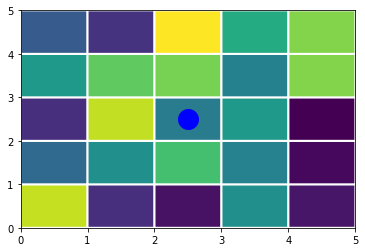

In [59]:
matrix=np.random.random((5,5))
fig, ax= plt.subplots()
ax.pcolor(matrix, edgecolors='w', linewidths=2)
ax.scatter(3-0.5,3-0.5, s=400,c='b' )
fig.show()

In [ ]:

def SARSA(env, lr=0.01, num_episodes=10000, eps=0.3, gamma=0.95):
    nA = env.action_space.n
    nS = env.observation_space.n

    Q = np.zeros((nS, nA))
    games_reward = []
    test_rewards = []

    for ep in range(num_episodes):
        state = env.reset()
        done = False
        tot_rew = 0


        action = eps_greedy(Q, state, eps) 

        while not done:
            next_state, rew, done, _ = env.step(action) 

            # choose the next action (needed for the SARSA update)
            next_action = eps_greedy(Q, next_state, eps) 
            # SARSA update
            Q[state][action] = Q[state][action] + lr*(rew + gamma*Q[next_state][next_action] - Q[state][action])

            state = next_state
            action = next_action
            tot_rew += rew
            if done:
                games_reward.append(tot_rew)

        # Test the policy every 300 episodes and print the results
        if (ep % 300) == 0:
            test_rew = run_episodes(env, Q, 1000)
            print("Episode:{:5d}  Eps:{:2.4f}  Rew:{:2.4f}".format(ep, eps, test_rew))
            test_rewards.append(test_rew)

In [ ]:
#Defining the different parameters
epsilon = 0.9
total_episodes = 10000
max_steps = 100
alpha = 0.85
gamma = 0.95
 
#Initializing the Q-matrix
Q = np.zeros((env.observation_space.n, env.action_space.n))

#Function to choose the next action
def choose_action(state):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state, :])
    return action
 
#Function to learn the Q-value
def update(state, state2, reward, action, action2):
    predict = Q[state, action]
    target = reward + gamma * Q[state2, action2]
    Q[state, action] = Q[state, action] + alpha * (target - predict)

#Initializing the reward
reward=0
 
# Starting the SARSA learning
for episode in range(total_episodes):
    t = 0
    state1 = env.reset()
    action1 = choose_action(state1)
 
    while t < max_steps:
        #Visualizing the training
        env.render()
         
        #Getting the next state
        state2, reward, done, info = env.step(action1)
 
        #Choosing the next action
        action2 = choose_action(state2)
         
        #Learning the Q-value
        update(state1, state2, reward, action1, action2)
 
        state1 = state2
        action1 = action2
         
        #Updating the respective vaLues
        t += 1
        reward += 1
         
        #If at the end of learning process
        if done:
            break



In [60]:
class QLearn:
    def __init__(self, actions, epsilon=0.1, alpha=0.2, gamma=0.9):
        self.q = {}

        self.epsilon = epsilon  # exploration constant
        self.alpha = alpha      # discount constant
        self.gamma = gamma
        self.actions = actions

    def getQ(self, state, action):
        return self.q.get((state, action), 0.0)
        # return self.q.get((state, action), 1.0)

    def learnQ(self, state, action, reward, value):
        '''
        Q-learning:        
            Q(s, a) += alpha * (reward(s,a) + max(Q(s') - Q(s,a))
        '''
        oldv = self.q.get((state, action), None)
        if oldv is None:
            self.q[(state, action)] = reward
        else:
            self.q[(state, action)] = oldv + self.alpha * (value - oldv)

    def chooseAction(self, state):
        if random.random() < self.epsilon:
            action = random.choice(self.actions)
        else:
            q = [self.getQ(state, a) for a in self.actions]
            maxQ = max(q)
            count = q.count(maxQ)
            # In case there're several state-action max values 
            # we select a random one among them
            if count > 1:
                best = [i for i in range(len(self.actions)) if q[i] == maxQ]
                i = random.choice(best)
            else:
                i = q.index(maxQ)

            action = self.actions[i]
        return action

    def learn(self, state1, action1, reward, state2):
        maxqnew = max([self.getQ(state2, a) for a in self.actions])
        self.learnQ(state1, action1, reward, reward + self.gamma*maxqnew)

import math
def ff(f,n):
    fs = "{:f}".format(f)
    if len(fs) < n:
        return ("{:"+n+"s}").format(fs)
    else:
        return fs[:n]

  



In [ ]:

q = {}

epsilon = epsilon  # exploration constant
alpha = alpha      # discount constant
gamma = gamma
actions = actions

def getQ(state, action):
    return q.get((state, action), 0.0)
    # return q.get((state, action), 1.0)

def learnQ(state, action, reward, value):
    '''
    Q-learning:        
        Q(s, a) += alpha * (reward(s,a) + max(Q(s') - Q(s,a))
    '''
    oldv = q.get((state, action), None)
    if oldv is None:
        q[(state, action)] = reward
    else:
        q[(state, action)] = oldv + alpha * (value - oldv)

def chooseAction(state):
    if random.random() < epsilon:
        action = random.choice(actions)
    else:
        q = [getQ(state, a) for a in actions]
        maxQ = max(q)
        count = q.count(maxQ)
        # In case there're several state-action max values 
        # we select a random one among them
        if count > 1:
            best = [i for i in range(len(actions)) if q[i] == maxQ]
            i = random.choice(best)
        else:
            i = q.index(maxQ)

        action = actions[i]
    return action

def learn(state1, action1, reward, state2):
    maxqnew = max([getQ(state2, a) for a in actions])
    learnQ(state1, action1, reward, reward + gamma*maxqnew)






In [ ]:
# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# For plotting metrics
all_epochs = []
all_penalties = []

for i in range(1, 100001):
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        next_state, reward, done, info = env.step(action) 
        
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1
        
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")
